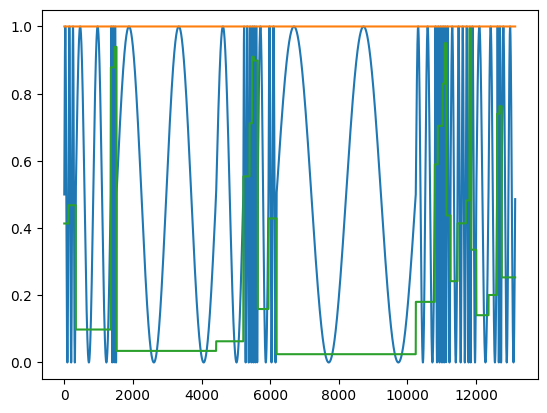

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN
def generateRandomSinusoid():
    fs = 50
    T = 1/fs
    start_time = 0
    f1 = np.random.rand()
    n_periods = np.random.randint(1,3)
    end_time = n_periods/f1
    t = np.arange(start_time,end_time,T)
    
    x1 = (1/2)*(np.sin(2*np.pi*t*f1)+1)
    return f1,x1
# ctrl with initialization row
ctrl = np.array([1,0])
output = np.array([-1])
for i in range(30):
    f1,x = generateRandomSinusoid()
    ctrl = np.vstack((ctrl,[[1,f1]]*len(x)))
    output = np.hstack((output,x))
    
# remove initialization row
ctrl = np.delete(ctrl,0,axis=0)
output = np.delete(output,0).reshape(-1,1)
plt.plot(output)
plt.plot(ctrl)
traintest_cutoff = int(np.ceil(0.7*len(output)))

train_ctrl,train_output = ctrl[:traintest_cutoff],output[:traintest_cutoff]
test_ctrl, test_output  = ctrl[traintest_cutoff:],output[traintest_cutoff:]

In [37]:
esn = ESN(n_inputs = 2,
          n_outputs = 1,
          n_reservoir = 100,
          spectral_radius = 0.25,
          sparsity = 0.95,
          noise = 0.001,
          input_shift = [0,0],
          input_scaling = [0.01, 3],
          teacher_scaling = 1.12,
          teacher_shift = -0.7,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          silent = False)

pred_train = esn.fit(train_ctrl,train_output)
print("test error:")


harvesting states...
fitting...
training error:
0.0026936927293126837
test error:


0.5884682492055456


(-0.1, 1.1)

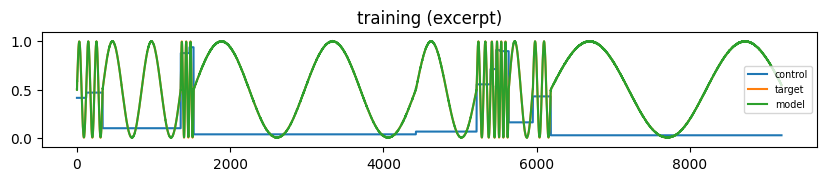

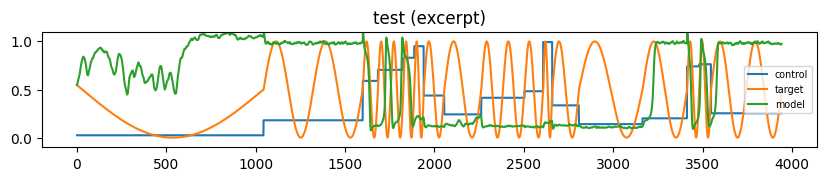

In [38]:

pred_test = esn.predict(test_ctrl)
print(np.sqrt(np.mean((pred_test - test_output)**2)))
plt.figure(figsize=(10,1.5))
plt.plot(train_ctrl[:,1],label='control')
plt.plot(train_output,label='target')
plt.plot(pred_train,label='model')
plt.legend(fontsize='x-small')
plt.title('training (excerpt)')
plt.ylim([-0.1,1.1])

plt.figure(figsize=(10,1.5))
plt.plot(test_ctrl[:,1],label='control')
plt.plot(test_output,label='target')
plt.plot(pred_test,label='model')
plt.legend(fontsize='x-small')
plt.title('test (excerpt)')
plt.ylim([-0.1,1.1])


Text(0.5, 1.0, 'test: model')

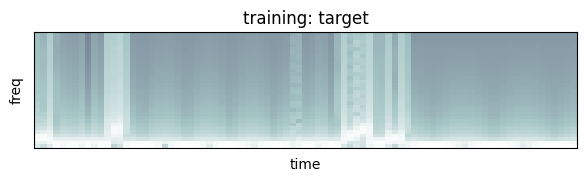

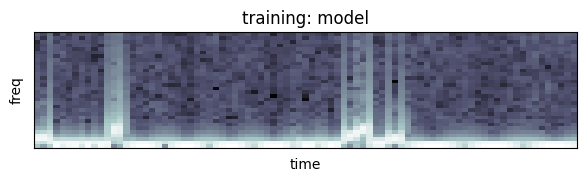

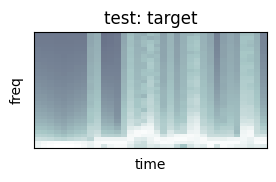

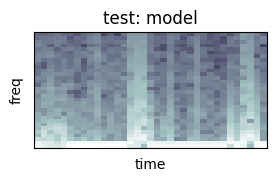

In [39]:
def draw_spectogram(data):
    plt.specgram(data,Fs=4,NFFT=256,noverlap=150,cmap=plt.cm.bone,detrend=lambda x:(x-0.5))
    plt.gca().autoscale('x')
    plt.ylim([0,0.5])
    plt.ylabel("freq")
    plt.yticks([])
    plt.xlabel("time")
    plt.xticks([])

plt.figure(figsize=(7,1.5))
draw_spectogram(train_output.flatten())
plt.title("training: target")
plt.figure(figsize=(7,1.5))
draw_spectogram(pred_train.flatten())
plt.title("training: model")

plt.figure(figsize=(3,1.5))
draw_spectogram(test_output.flatten())
plt.title("test: target")
plt.figure(figsize=(3,1.5))
draw_spectogram(pred_test.flatten())
plt.title("test: model")